In [18]:
!pip install torchsummary

Defaulting to user installation because normal site-packages is not writeable


In [1]:
from torchsummary import summary

In [ ]:
# download.py

import os
import sys
import urllib3
from urllib.parse import urlparse
import pandas as pd
import itertools
import shutil

from urllib3.util import Retry

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

classes = ["cat", "fish"]
set_types = ["train", "test", "val"]

def download_image(url, klass, data_type):
    basename = os.path.basename(urlparse(url).path)
    filename = "{}/{}/{}".format(data_type, klass, basename)
    if not os.path.exists(filename):
        try: 
            http = urllib3.PoolManager(retries=Retry(connect=1, read=1, redirect=2))
            with http.request("GET", url, preload_content=False) as resp, open(
                filename, "wb"
            ) as out_file:
                if resp.status == 200:
                    shutil.copyfileobj(resp, out_file)
                else:
                    print("Error downloading {}".format(url))
            resp.release_conn()
        except:
            print("Error downloading {}".format(url))


if __name__ == "__main__":
    if not os.path.exists("images.csv"):
        print("Error: can't find images.csv!")
        sys.exit(0)

    # get args and create output directory
    imagesDF = pd.read_csv("images.csv")

    for set_type, klass in list(itertools.product(set_types, classes)):
        path = "./{}/{}".format(set_type, klass)
        if not os.path.exists(path):
            print("Creating directory {}".format(path))
            os.makedirs(path)

    print("Downloading {} images".format(len(imagesDF)))

    result = [
        download_image(url, klass, data_type)
        for url, klass, data_type in zip(
            imagesDF["url"], imagesDF["class"], imagesDF["type"]
        )
    ]
    sys.exit(0)

Creating directory ./train/cat
Creating directory ./train/fish
Creating directory ./test/cat
Creating directory ./test/fish
Creating directory ./val/cat
Creating directory ./val/fish
Error downloading http://farm1.static.flickr.com/1/1004525_cba96ba3c3.jpg
Error downloading http://farm1.static.flickr.com/33/65048097_e5264bf855.jpg
Error downloading http://farm3.static.flickr.com/2354/2102976081_61c8614be8.jpg
Error downloading http://farm2.static.flickr.com/1390/709949156_5e4ac3f499.jpg
Error downloading http://farm2.static.flickr.com/1221/1011749126_44a195db4c.jpg
Error downloading http://farm1.static.flickr.com/173/416994740_6ada308baa.jpg
Error downloading http://farm1.static.flickr.com/3/4193130_a058cdb81f.jpg
Error downloading http://farm1.static.flickr.com/1/1004528_a111209743.jpg
Error downloading http://farm1.static.flickr.com/60/174732335_7275892317.jpg
Error downloading http://farm1.static.flickr.com/223/522289072_13b4f92d39.jpg
Error downloading http://farm1.static.flickr.co

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from PIL import Image

In [3]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [4]:
# Download training data from open datasets.
training_data = datasets.MNIST( # FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST( # FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [5]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


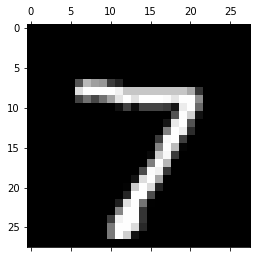

In [6]:
import matplotlib.pyplot as plt

for X, y in test_dataloader:
    plt.matshow(X[0].reshape(28, 28), cmap=plt.cm.gray);    
    break

In [7]:
for X, y in test_dataloader:
    print(X[0])    
    break

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [8]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [9]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [10]:
28*28

784

In [11]:
summary(model, input_size=(28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 512]         401,920
              ReLU-3                  [-1, 512]               0
            Linear-4                  [-1, 512]         262,656
              ReLU-5                  [-1, 512]               0
            Linear-6                   [-1, 10]           5,130
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 2.55
Estimated Total Size (MB): 2.58
----------------------------------------------------------------


In [12]:
sum(p.numel() for p in model.parameters())

669706

In [13]:
64
11
4
2

2

In [24]:
import numpy as np

np.mean(np.random.rand(3, 6,8).reshape(3,2,3,2,4), axis=(2, 4)).shape

(3, 2, 2)

In [25]:
class CNNNet(nn.Module):

    def __init__(self, num_classes=10):
        super(CNNNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Linear(4096, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x
    
cnnnet = CNNNet().to(device)
print(cnnnet)

CNNNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4)

In [49]:
class CNNNet(nn.Module):

    def __init__(self, num_classes=10):
        super(CNNNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 28, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(28, 84, kernel_size=3, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=1),
#             nn.Conv2d(192, 384, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(384, 256, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(256, 256, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((3, 3))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(84 * 3 * 3, 40),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(40, 20),
            nn.ReLU(),
            nn.Linear(20, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x
    
cnnnet = CNNNet().to(device)
print(cnnnet)

CNNNet(
  (features): Sequential(
    (0): Conv2d(1, 28, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(28, 84, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(3, 3))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=756, out_features=40, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=40, out_features=20, bias=True)
    (5): ReLU()
    (6): Linear(in_features=20, out_features=10, bias=True)
  )
)


In [38]:
sum(p.numel() for p in cnnnet.parameters())

53290

In [39]:
summary(cnnnet, input_size=( 1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 28, 28, 28]             728
              ReLU-2           [-1, 28, 28, 28]               0
         MaxPool2d-3           [-1, 28, 13, 13]               0
            Conv2d-4           [-1, 84, 15, 15]          21,252
              ReLU-5           [-1, 84, 15, 15]               0
         MaxPool2d-6           [-1, 84, 13, 13]               0
 AdaptiveAvgPool2d-7             [-1, 84, 3, 3]               0
           Dropout-8                  [-1, 756]               0
            Linear-9                   [-1, 40]          30,280
             ReLU-10                   [-1, 40]               0
          Dropout-11                   [-1, 40]               0
           Linear-12                   [-1, 20]             820
             ReLU-13                   [-1, 20]               0
           Linear-14                   

In [50]:
for el in cnnnet.parameters():
    print(el.shape)

torch.Size([28, 1, 5, 5])
torch.Size([28])
torch.Size([84, 28, 3, 3])
torch.Size([84])
torch.Size([40, 756])
torch.Size([40])
torch.Size([20, 40])
torch.Size([20])
torch.Size([10, 20])
torch.Size([10])


/tmp/ipykernel_10037/118522772.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.matshow(list(cnnnet.parameters())[0][i][0].cpu().detach().numpy(), cmap=plt.cm.gray)


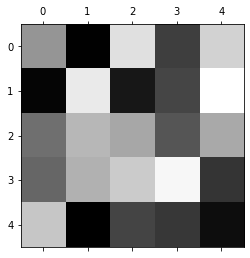

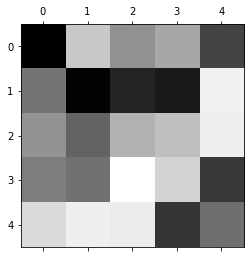

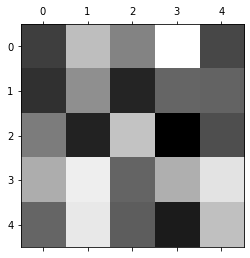

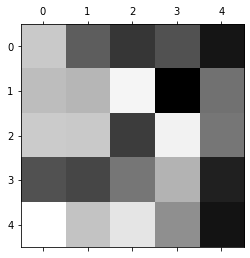

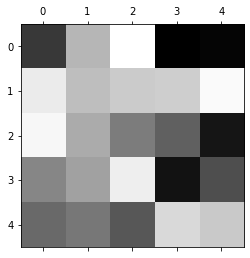

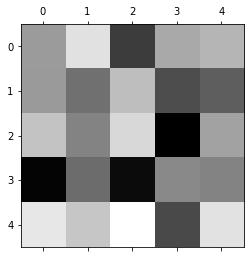

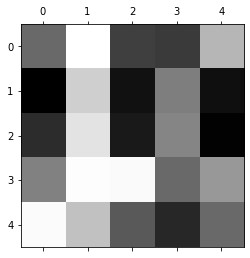

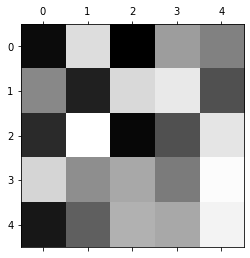

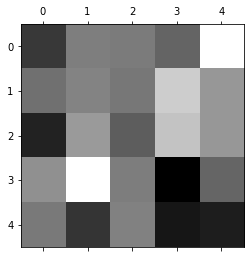

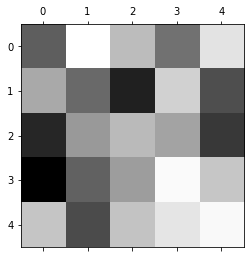

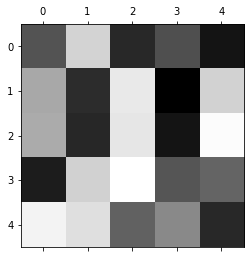

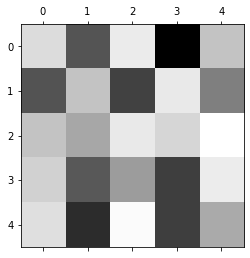

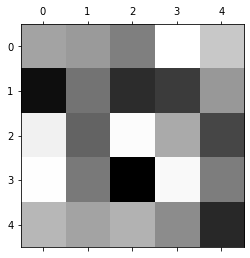

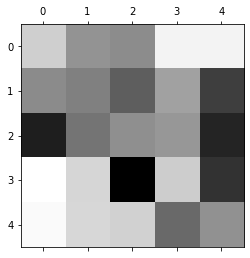

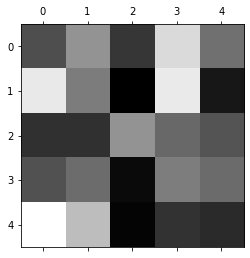

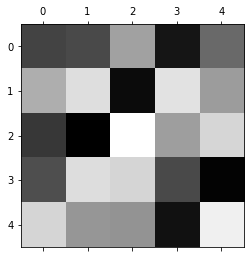

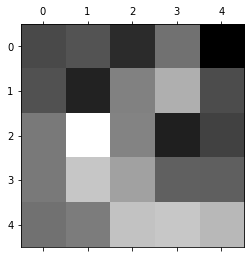

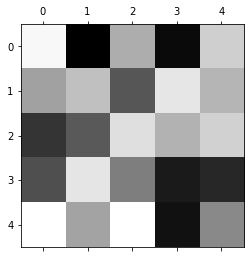

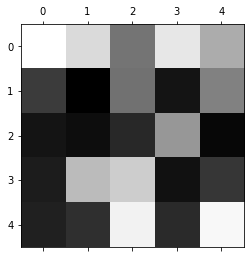

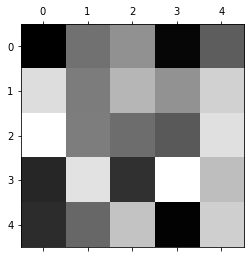

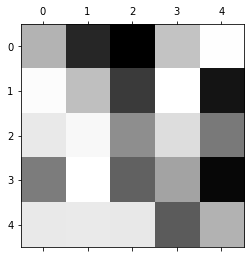

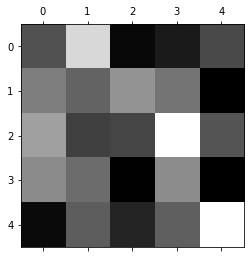

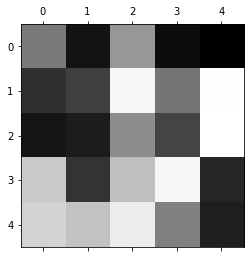

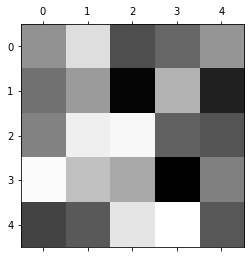

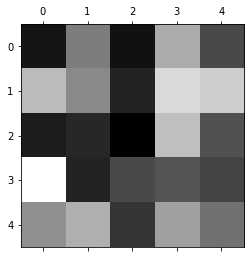

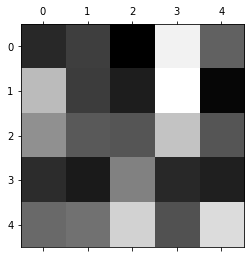

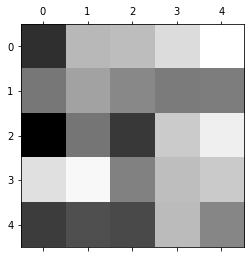

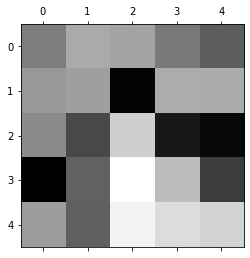

In [51]:
for i in range(28):
    plt.matshow(list(cnnnet.parameters())[3][i][0].cpu().detach().numpy(), cmap=plt.cm.gray)

/tmp/ipykernel_10037/118522772.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.matshow(list(cnnnet.parameters())[0][i][0].cpu().detach().numpy(), cmap=plt.cm.gray)


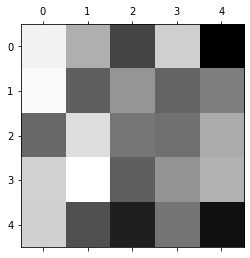

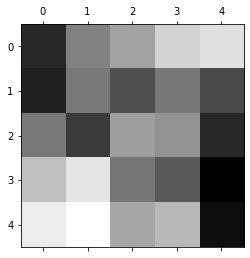

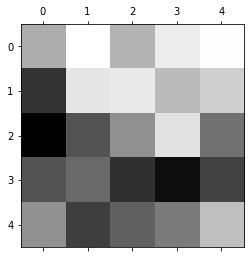

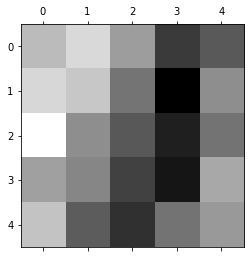

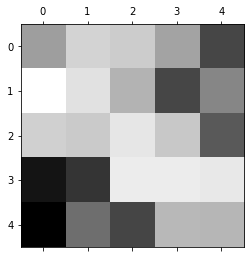

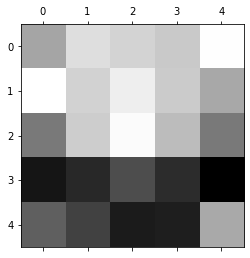

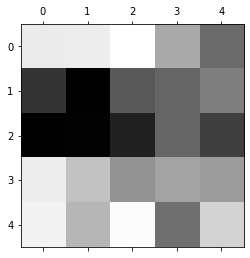

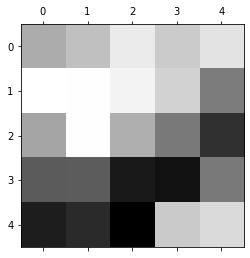

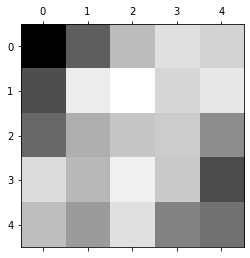

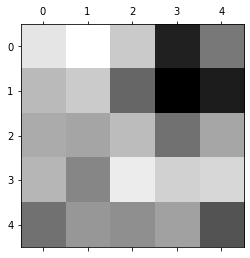

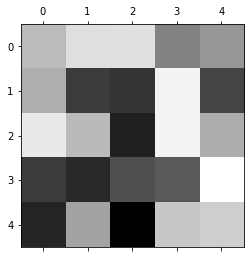

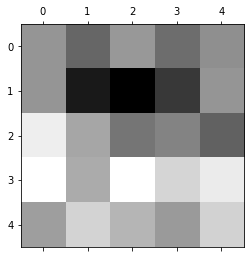

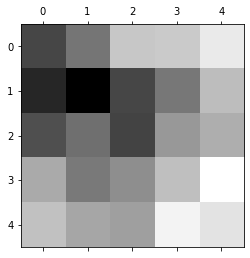

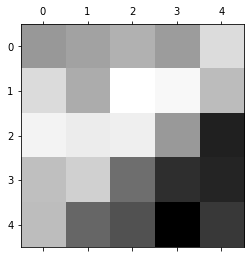

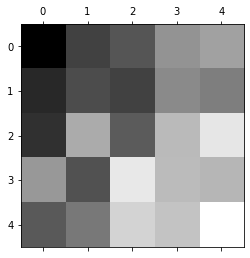

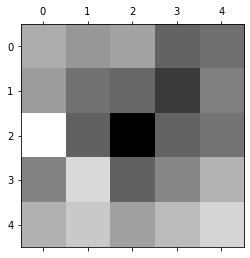

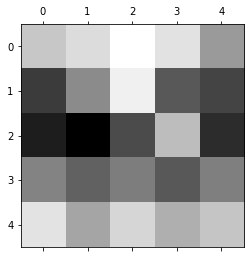

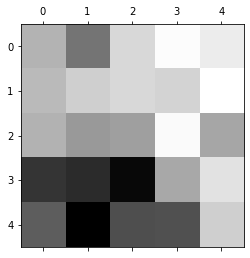

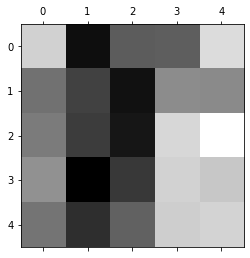

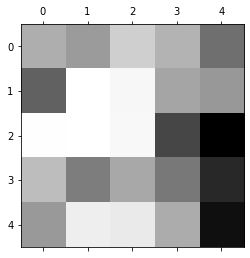

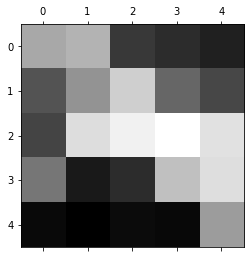

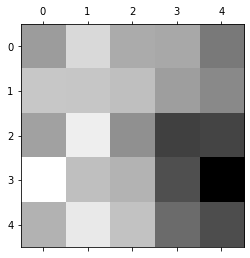

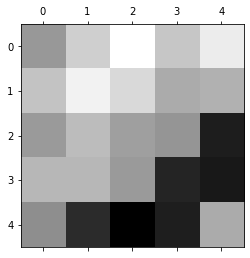

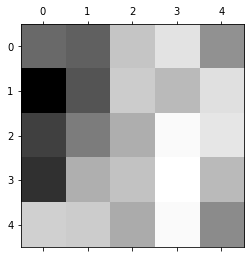

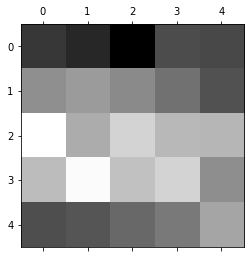

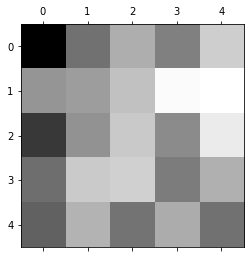

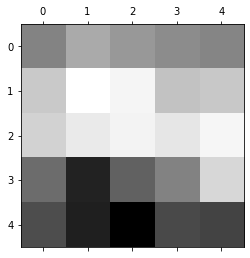

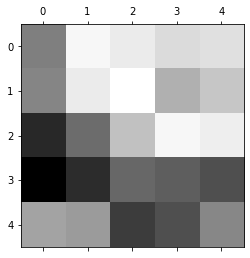

In [48]:
for i in range(28):
    plt.matshow(list(cnnnet.parameters())[0][i][0].cpu().detach().numpy(), cmap=plt.cm.gray)

In [44]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnnnet.parameters(), lr=0.001)

In [48]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [45]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [46]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [47]:
%%time
epochs = 3
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, cnnnet, loss_fn, optimizer)
    test(test_dataloader, cnnnet, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.304156  [   64/60000]
loss: 1.701073  [ 6464/60000]
loss: 0.848108  [12864/60000]
loss: 0.795572  [19264/60000]
loss: 0.800871  [25664/60000]
loss: 0.555155  [32064/60000]
loss: 0.384362  [38464/60000]
loss: 0.551905  [44864/60000]
loss: 0.779954  [51264/60000]
loss: 0.372809  [57664/60000]
Test Error: 
 Accuracy: 96.1%, Avg loss: 0.128036 

Epoch 2
-------------------------------
loss: 0.321235  [   64/60000]
loss: 0.482774  [ 6464/60000]
loss: 0.348824  [12864/60000]
loss: 0.348001  [19264/60000]
loss: 0.382765  [25664/60000]
loss: 0.437702  [32064/60000]
loss: 0.205762  [38464/60000]
loss: 0.245995  [44864/60000]
loss: 0.724570  [51264/60000]
loss: 0.303439  [57664/60000]
Test Error: 
 Accuracy: 97.5%, Avg loss: 0.080067 

Epoch 3
-------------------------------
loss: 0.221068  [   64/60000]
loss: 0.444537  [ 6464/60000]
loss: 0.391212  [12864/60000]
loss: 0.311721  [19264/60000]
loss: 0.267390  [25664/60000]
loss: 0.190855  [32064/600

In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

In [ ]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

In [ ]:
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):
    for epoch in range(1, epochs+1):
        training_loss = 0.0
        valid_loss = 0.0
        model.train()
        for batch in train_loader:
            optimizer.zero_grad()
            inputs, targets = batch
            inputs = inputs.to(device)
            targets = targets.to(device)
            output = model(inputs)
            loss = loss_fn(output, targets)
            loss.backward()
            optimizer.step()
            training_loss += loss.data.item() * inputs.size(0)
        training_loss /= len(train_loader.dataset)
        
        model.eval()
        num_correct = 0 
        num_examples = 0
        for batch in val_loader:
            inputs, targets = batch
            inputs = inputs.to(device)
            output = model(inputs)
            targets = targets.to(device)
            loss = loss_fn(output,targets) 
            valid_loss += loss.data.item() * inputs.size(0)
            correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1],
                               targets)
            num_correct += torch.sum(correct).item()
            num_examples += correct.shape[0]
        valid_loss /= len(val_loader.dataset)

        print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'.format(epoch, training_loss,
        valid_loss, num_correct / num_examples))

In [ ]:
def check_image(path):
    try:
        im = Image.open(path)
        return True
    except:
        return False

img_transforms = transforms.Compose([
    transforms.Resize((64,64)),    
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
    ])
train_data_path = "./train/"
train_data = torchvision.datasets.ImageFolder(root=train_data_path,transform=img_transforms, is_valid_file=check_image)
val_data_path = "./val/"
val_data = torchvision.datasets.ImageFolder(root=val_data_path,transform=img_transforms, is_valid_file=check_image)
batch_size=64
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,shuffle=True)
val_data_loader  = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True)



In [ ]:
train(cnnnet, optimizer,torch.nn.CrossEntropyLoss(), train_data_loader,val_data_loader, epochs=10, device=device)


In [ ]:
import torchvision.models as models
alexnet = models.alexnet(num_classes=1000, pretrained=True)
resnet50 = torch.hub.load('pytorch/vision', 'resnet50')
print(alexnet)
print(resnet50)
